In [0]:
# Bibliotecas principais
import numpy  as np
import pandas as pd


#  Bibliotecas para Corpus processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

In [0]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [0]:
# Importando arquivo csv e visualizando as 6 primeiras linhas
data = pd.read_csv('bbc_news_mixed.csv', sep = ',', encoding = 'latin 1')
data.head(6)

,text,label
0,Cairn shares slump on oil setback\n\nShares in...,business
1,Egypt to sell off state-owned bank\n\nThe Egyp...,business
2,Cairn shares up on new oil find\n\nShares in C...,business
3,Low-cost airlines hit Eurotunnel\n\nChannel Tu...,business
4,"Parmalat to return to stockmarket\n\nParmalat,...",business
5,Making your office work for you\n\nOur mission...,business


In [0]:
# Transformar a coluna desejada do data frame em uma lista e visualizando o 9º elemento
corpus = data['text'].to_list() 
corpus[8]

'Bargain calls widen Softbank loss\n\nJapanese communications firm Softbank has widened losses after heavy spending on a new cut-rate phone service.\n\nThe service, launched in December and dubbed "Otoku" or "bargain", has had almost 900,000 orders, Softbank said. The firm, a market leader in high-speed internet, had an operating loss for the three months to December of 7.5bn yen ($71.5m; Â£38.4m). But without the Otoku marketing spend it would have made a profit - and expects to move into the black in 2006. The firm did not give a figure for the extent of profits it expected to make next year. It was born in the 1990s tech boom, investing widely and becoming a fast-rising star, till the end of the tech bubble hit it hard. Its recent return to a high profile came with the purchase of Japan Telecom, the country\'s third-biggest fixed-line telecoms firm. The acquisition spurred its broadband internet division to pole position in the Japanese market, with more than 5.1 million subscribers

In [0]:
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [0]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    for document in corpus:
        index = corpus.index(document)
        #corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)
        
        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [0]:
language = 'english'
corpus = processCorpus(corpus, language)
corpus[8]

'german bidder talk lse deutsch boers boss held construct profession friend talk london stock exchang lse chief said werner seifert met lse chief execut clara furs amid rumour german group may rais bid initi offer howev rival suitor euronext also up ant bid battl ahead talk lse friday pan-european bours said may prepar make offer cash paris-bas exchang owner liff london report readi rais fund bid news came deutsch boers held third meet lse sinc bid approach decemb turn london exchang undervalu busi howev lse agre leav door open talk find whether propos would interest lse sharehold custom meantim euronext combin pari amsterdam lisbon stock exchang also began talk lse statement thursday euronext said offer like sole cash ad assur stage offer made deal either bidder would creat biggest stock market oper europ second biggest world new york stock exchang howev neither side made formal offer lse sourc claim step may still week away deutsch boers could also face mount opposit bid home among s

In [0]:
# Aplicando o TFIDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print("X.shape: ",X.shape)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} linhas".format(final_df.shape[0])) 

# As 5 primeiras palavras coom maior peso no documento 9
final_df.T.nlargest(5, 8)

X.shape:  (2225, 19152)
2225 linhas


,0,1,2,3,4,5,6,7,8,9,...,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224
lse,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.529100,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
boers,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.293944,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
frankfurt,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.226168,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
deutsch,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.192021,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
exchang,0.0,0.050285,0.0,0.0,0.087901,0.0,0.0,0.090186,0.187537,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# visualizando a matriz tfidf gerada
final_df

,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,aaron,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data.label

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: label, Length: 2225, dtype: object

In [0]:
data.label.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["resposta"] = pd.Series(le.fit_transform(data.label))

In [0]:
result = pd.concat([final_df, data["resposta"]], axis=1)

In [0]:
result.resposta.value_counts()

3    511
0    510
2    417
4    401
1    386
Name: resposta, dtype: int64

In [0]:
result

,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,aaron,...,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev,resposta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [0]:
X = result.drop('resposta', axis=1)
y = result["resposta"]

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0),"\n")
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('\nClassification Report:\n',classification_report(y_test, y_pred))

Accuracy: 93.26% 

Confusion matrix:
 [[150   4   8   0   3]
 [  3 111   0   3   1]
 [  6   1 106   1   6]
 [  0   0   1 138   1]
 [  6   1   0   0 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       165
           1       0.95      0.94      0.94       118
           2       0.92      0.88      0.90       120
           3       0.97      0.99      0.98       140
           4       0.91      0.94      0.93       125

    accuracy                           0.93       668
   macro avg       0.93      0.93      0.93       668
weighted avg       0.93      0.93      0.93       668



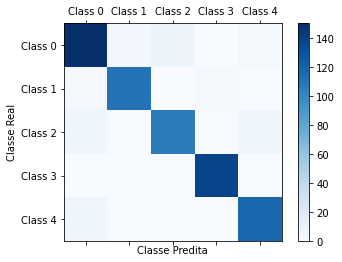

In [0]:
from matplotlib import pyplot as plt
labels = ['Class 0', 'Class 1','Class 2','Class 3', 'Class 4']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

In [0]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0),"\n")
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('\nClassification Report:\n',classification_report(y, y_pred))

Accuracy: 97.98% 

Confusion matrix:
 [[495   4   8   0   3]
 [  3 379   0   3   1]
 [  6   1 403   1   6]
 [  0   0   1 509   1]
 [  6   1   0   0 394]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       510
           1       0.98      0.98      0.98       386
           2       0.98      0.97      0.97       417
           3       0.99      1.00      0.99       511
           4       0.97      0.98      0.98       401

    accuracy                           0.98      2225
   macro avg       0.98      0.98      0.98      2225
weighted avg       0.98      0.98      0.98      2225



In [0]:
model_completo = XGBClassifier()
model_completo.fit(X,y)
model_completo.predict(X)
